# _Sentiment Analysis of Restaurant Reviews Using NLP_

<img src='https://assets.simpleviewcms.com/simpleview/image/fetch/c_pad,h_600,q_75,w_1122/https://lasvegas.simpleviewcrm.com/images/listings/original_Bacchanal-Buffet-at-Caesars-Palace.jpg'>

_Bu proje, restoran kullanıcı yorumlarının doğal dil işleme (NLP) teknikleri kullanılarak analiz edilmesini ve duygu sınıflarına ayrılmasını amaçlamaktadır. restaurant.csv veri seti üzerinden yorumlar temizlenip işlendikten sonra, pozitif, negatif veya nötr duygu sınıflarına sınıflandırılacaktır. Model performansı değerlendirilerek, restoran işletmelerinin müşteri geri bildirimlerini daha iyi anlamaları ve hizmetlerini iyileştirmeleri hedeflenmektedir. Projede ayrıca kelime bulutları ve görselleştirmeler ile yorumların genel eğilimleri görselleştirilmektedir._

### _İmport_

In [1]:
import pandas as pd  
# Veri işleme ve DataFrame kullanımı için pandas kütüphanesini içe aktarır

from sklearn.model_selection import train_test_split  
# Veriyi eğitim ve test setlerine ayırmak için gerekli fonksiyonu içe aktarır

from sklearn.feature_extraction.text import CountVectorizer  
# Metinleri sayısal vektörlere dönüştürmek için CountVectorizer sınıfını içe aktarır

from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Input, Dropout  
# Yapay sinir ağı modeli oluşturmak ve katmanlar eklemek için Keras kütüphanesini içe aktarır

from sklearn.metrics import accuracy_score  
# Modelin doğruluk (accuracy) performansını ölçmek için fonksiyonu içe aktarır

from textblob import TextBlob  
# Metin analizi ve kelime işlemleri için TextBlob kütüphanesini içe aktarır

import numpy as np  
# Sayısal hesaplamalar ve dizilerle çalışmak için numpy kütüphanesini içe aktarır

import matplotlib.pyplot as plt  
import seaborn as sns  
# Veri görselleştirme için matplotlib ve seaborn kütüphanelerini içe aktarır

import warnings
# Python'daki uyarı (warning) mesajlarını kontrol etmek için warnings modülünü içe aktarır
warnings.filterwarnings("ignore")
# Çalışma sırasında oluşan tüm uyarı mesajlarının ekranda gösterilmesini engeller

In [2]:
import neattext.functions as nfx  

# neattext kütüphanesinden metin temizleme ve ön işleme fonksiyonlarını içe aktarır

from collections import Counter  

# Kelime ve öğe frekanslarını saymak için Counter sınıfını içe aktarır

### _Read Data_

In [3]:
df = pd.read_csv('restaurant.csv', encoding='iso-8859-1')  

# 'spam.csv' dosyasını pandas DataFrame olarak yükler; encoding belirtilerek karakter hatalarının önüne geçilir

### _Eda_

In [4]:
df.head()  

# DataFrame’in ilk 5 satırını görüntüler; veri yapısını hızlıca görmek için kullanılır

Unnamed: 0               review_id                 user_id  \
0     2370338  _WTGv5XnA-qb_XD1D7Z0jg  6PgdGb3HrZdsfl2GiULo8w   
1     2370357  JlNnsvMPLK_1-X2hwzK24w  IS9yw8P2uAPBX6FNLLX4KA   
2     2370373  hBkoWffORRb6aqKhC_Li2A  uZdFsE_aHbFBChgN6Xa8tw   
3     2370411  rbkxvrgZg5kdCL2a66QYmA  8ZWJNAEWsymXDzKx3B0tTQ   
4     2370500  5tw_pedoHVi9bgeiBNsISg  E0sm4Ve7ifanFYeQMcV8Eg   

              business_id  stars  useful  funny  cool  \
0  RESDUcs7fIiihp38-d6_6g      5       0      1     0   
1  RESDUcs7fIiihp38-d6_6g      4      39     21    29   
2  RESDUcs7fIiihp38-d6_6g      4       1      1     1   
3  RESDUcs7fIiihp38-d6_6g      1       0      0     0   
4  RESDUcs7fIiihp38-d6_6g      5       0      0     0   

                                                text                 date  
0  After getting food poisoning at the Palms hote...  2012-12-04 03:10:18  
1  "A feast worthy of Gods"\n\nBaccarnal Buffet i...  2014-01-17 00:50:50  
2  The crab legs are better than the ones at Wick...  2015-06-08 18:03:09  
3  Not worth it! Too salty food and expensive! Th...  2016-12-19 16:15:29  
4  I would give this infinite stars if I could. M...  2015-07-28 07:13:17

In [5]:
df.info()  

# DataFrame’in sütun bilgilerini, veri tiplerini ve eksik değerleri özetler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [6]:
# Gereksiz sütunları düşür

df = df.drop(columns=["Unnamed: 0", "review_id", "user_id", "business_id", "date","useful","funny","cool","date"])

In [7]:
# Sütun adlarını değiştir

df = df.rename(columns={"text": "review", "stars": "rating"})

In [8]:
df = df[(df.rating == 1) | (df.rating == 5)]  

# 1 yıldız ve 5 yıldızlı yorumları filtreler; kötü ve iyi yorumları ayırmak için

In [9]:
df = df.reset_index(drop=True)  

# Filtrelenen DataFrame’in indekslerini baştan numaralandırır ve eski indeksleri siler

In [10]:
df.head()  

# Gereksiz sütunlar kaldırıldıktan sonra DataFrame’in ilk 5 satırını görüntüler

rating                                             review
0       5  After getting food poisoning at the Palms hote...
1       1  Not worth it! Too salty food and expensive! Th...
2       5  I would give this infinite stars if I could. M...
3       5  Really enjoyed everything they had to offer. I...
4       5  Lots of choices. Good service. Line wasn't as ...

### _Text Cleaning and Preprocessing with NeatText_

_Metin verileri, makine öğrenmesi ve doğal dil işleme (NLP) projelerinde genellikle ham ve gürültülü bir yapıdadır. Bu nedenle modelleme aşamasından önce metinlerin temizlenmesi ve standart bir formata getirilmesi kritik bir adımdır. Bu çalışmada, restaurant yorumları üzerinde NeatText kütüphanesi kullanılarak metin temizleme ve ön işleme adımları uygulanmıştır._

#### _İmport_

In [11]:
import neattext as nfx  

# Metin temizleme ve ön işleme işlemleri için neattext kütüphanesini içe aktarır

#### _Normalize_

In [12]:
df['review'] = df['review'].apply(nfx.normalize)  

# DataFrame’deki tüm metinleri normalize eder; boşlukları düzeltir ve yazım standartlarını uygular

#### _Clean Text_

In [13]:
df['review'] = df['review'].apply(nfx.clean_text)  

# DataFrame’deki tüm metinleri temizler; özel karakterler, sayılar ve gereksiz boşlukları kaldırır

#### _Remove Special Characters_

In [14]:
df['review'] = df['review'].apply(nfx.remove_special_characters)  

# DataFrame’deki metinlerden özel karakterleri kaldırır

In [15]:
df['review']  

# Temizlenmiş ve özel karakterlerden arındırılmış metin sütununu görüntüler

0       getting food poisoning palms hotel scared eat ...
1       worth it salty food expensive furst kast visit...
2       infinite stars could family diamond card caesa...
3       enjoyed offer good idea start asian walk buffe...
4       lots choices good service line long expected d...
                              ...                        
5298    went bacchanal easter sunday brothers birthday...
5299    came la thanksgiving week decided eat here wai...
5300    time visit las vegas buffet buffet biggest bes...
5301    best buffet ever irma great served better plac...
5302    selection amazing food excellently prepared es...
Name: review, Length: 5303, dtype: object

#### _Join Text_

In [16]:
s = ' '.join(df['review'])  

# Tüm metinleri tek bir string hâline getirir; kelime frekans analizi ve görselleştirme için kullanılır

s  

# Birleştirilmiş ve temizlenmiş tüm metni görüntüler

'getting food poisoning palms hotel scared eat buffets figured high price tag positive reviews etc worth chance im glad gave try btw uploaded collage things ate seafood line far longest recommend showing heels female feet killing line door line sat seafood line totally worth though prime rib best ive had loved sweet potato tots pho music great server alma  older gentleman mustache attentive delightful return trip comfortable shoes horrible visit palms non stop issues matter hours establishment truly high light trip thank exquisite dinner worth it salty food expensive furst kast visit buffet infinite stars could family diamond card caesars palace skipped long line literally wait food perfect king crab legs lamb chops honorable mention me cant possibly ask better buffet world star food unlimited supply enjoyed offer good idea start asian walk buffet actually start picking food choose from went tuesday night line long know like glad able use diamond status skip line seafood station people

In [17]:
s = nfx.clean_text(s)  

# Birleştirilmiş metni temizler; özel karakterler, sayılar ve gereksiz boşlukları kaldırır

In [18]:
s = nfx.remove_special_characters(s)  

# Metindeki özel karakterleri kaldırır; yalnızca harf ve sayıları bırakır

s  

# Temizlenmiş ve özel karakterlerden arındırılmış birleşik metni görüntüler

'getting food poisoning palms hotel scared eat buffets figured high price tag positive reviews etc worth chance im glad gave try btw uploaded collage things ate seafood line far longest recommend showing heels female feet killing line door line sat seafood line totally worth prime rib best ive loved sweet potato tots pho music great server alma older gentleman mustache attentive delightful return trip comfortable shoes horrible visit palms non stop issues matter hours establishment truly high light trip thank exquisite dinner worth salty food expensive furst kast visit buffet infinite stars family diamond card caesars palace skipped long line literally wait food perfect king crab legs lamb chops honorable mention cant possibly ask better buffet world star food unlimited supply enjoyed offer good idea start asian walk buffet actually start picking food choose went tuesday night line long know like glad able use diamond status skip line seafood station people waiting constantly refilling

### _Exploratory Data Analysis on Cleaned Text Data_

In [19]:
s = nfx.TextFrame(s)  

# Metni neattext’in TextFrame objesine dönüştürür; metin analizi ve istatistikleri için kullanılabilir

In [20]:
s.describe()  

# TextFrame içindeki metinle ilgili istatistikleri özetler; kelime sayısı, karakter sayısı gibi bilgiler verir

Key      Value          
Length  : 1895855        
vowels  : 604449         
consonants: 1009978        
stopwords: 0              
punctuations: 0              
special_char: 0              
tokens(whitespace): 281429         
tokens(words): 281429         


In [21]:
s.length  

# TextFrame içindeki toplam karakter sayısını verir

1895855

In [22]:
s.head()  

# TextFrame içindeki ilk birkaç satırı veya metin örneklerini görüntüler

'getti'

In [23]:
s.tail()  

# TextFrame içindeki son birkaç satırı veya metin örneklerini görüntüler

' time'

In [24]:
s.readability()  

# TextFrame içindeki metinlerin okunabilirlik skorunu hesaplar
# (örneğin Flesch Reading Ease veya benzeri metrikler)

{'automated readability': 140724.79905795067, 'description': None}

### _x - y_

In [25]:
x = df['review']  
# Modelin girdi (features) verisi olarak yalnızca metin sütununu alır

y = df[['rating']]  
# Modelin hedef (target) verisi olarak yıldız sütununu alır

### _Seaborn_

In [26]:
import seaborn as sns  

# Veri görselleştirme için seaborn kütüphanesini içe aktarır

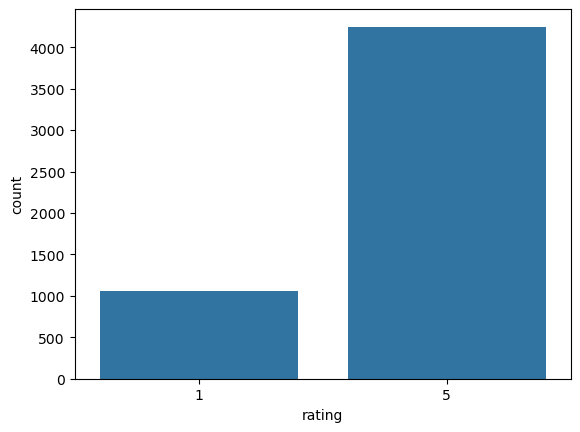

In [27]:
sns.countplot(x=df['rating']);  

# Spam veri setindeki sınıf dağılımını görselleştirir
# 'ham' ve 'spam' mesajların sayısını karşılaştırmak için kullanılır

In [28]:
d = {1: 0, 5: 1}  
y.loc[:, 'rating'] = y['rating'].map(d)  

# Makine öğrenmesi modellerinde hedef değişkeni ikili sınıf (0 ve 1) olarak tanımladık
# 1 yıldız → 0 (negatif), 5 yıldız → 1 (pozitif)

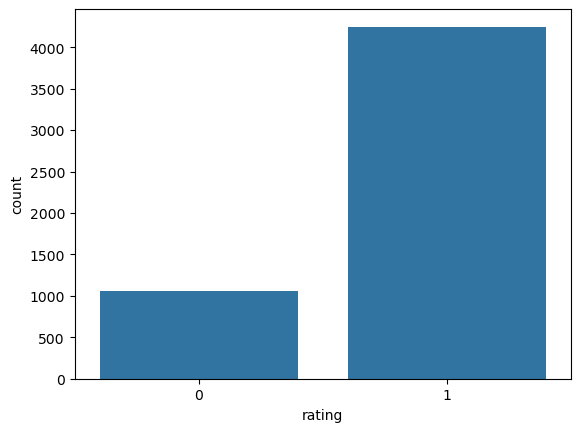

In [29]:
sns.countplot(x=y['rating']);  

# Hedef verideki negatif (0) ve pozitif (1) yorum sayısını görselleştirir

In [30]:
def ekkok(review):
    words = TextBlob(review).words
    return [word.lemmatize() for word in words]

# Metni token'lara ayırır ve her kelimenin kökünü (lemma) bulur

In [31]:
x.head()  

# Girdi verisi (yorum metinleri) sütununun ilk 5 satırını görüntüler

0    getting food poisoning palms hotel scared eat ...
1    worth it salty food expensive furst kast visit...
2    infinite stars could family diamond card caesa...
3    enjoyed offer good idea start asian walk buffe...
4    lots choices good service line long expected d...
Name: review, dtype: object

In [32]:
from sklearn.feature_extraction.text import CountVectorizer  

# Metinleri sayısal vektörlere dönüştürmek için CountVectorizer sınıfını içe aktarır

In [33]:
vect = CountVectorizer(stop_words='english', analyzer=ekkok, ngram_range=(1,2))  
# Metni vektörleştirirken:
# - ekkok fonksiyonu ile kelimelerin köklerini alır (lemmatization)
# - İngilizce stopwordsleri kaldırır
# - 1-gram ve 2-gram kombinasyonlarını dikkate alır

x_vect = vect.fit_transform(x).toarray()  
# Metinleri sayısal vektörlere dönüştürür ve NumPy dizisi olarak saklar

In [34]:
x_vect.shape  

# Vektörleştirilmiş metin verisinin boyutunu verir: (örnek sayısı, kelime/özellik sayısı)

(5303, 14448)

In [35]:
# Sayısal hale gelen veriyi bir Pandas DataFrame'e dönüştürüyoruz
tf = pd.DataFrame(
    vect.fit_transform(x).toarray(),
    
    # Sütun isimleri olarak, vectorizer'ın öğrendiği kelime listesini kullanıyoruz
    # Her sütun bir kelimeyi, her satır bir dokümanı temsil eder
    columns=vect.get_feature_names_out()
)

In [36]:
tf

# Oluşturulan DataFrame'i görüntülüyoruz

a  aa  aaa  aaaah  aaaawesome  aaahhh  aaamazinnng  aaammmaaazzingggg  \
0     0   0    0      0           0       0            0                  0   
1     0   0    0      0           0       0            0                  0   
2     0   0    0      0           0       0            0                  0   
3     0   0    0      0           0       0            0                  0   
4     0   0    0      0           0       0            0                  0   
...  ..  ..  ...    ...         ...     ...          ...                ...   
5298  0   0    0      0           0       0            0                  0   
5299  0   0    0      0           0       0            0                  0   
5300  0   0    0      0           0       0            0                  0   
5301  0   0    0      0           0       0            0                  0   
5302  0   0    0      0           0       0            0                  0   

      aahim  aai  ...  zone  zonecold  zong  zoo  zorro  zu  zubereitet  \
0         0    0  ...     0         0     0    0      0   0           0   
1         0    0  ...     0         0     0    0      0   0           0   
2         0    0  ...     0         0     0    0      0   0           0   
3         0    0  ...     0         0     0    0      0   0           0   
4         0    0  ...     0         0     0    0      0   0           0   
...     ...  ...  ...   ...       ...   ...  ...    ...  ..         ...   
5298      0    0  ...     0         0     0    0      0   0           0   
5299      0    0  ...     0         0     0    0      0   0           0   
5300      0    0  ...     0         0     0    0      0   0           0   
5301      0    0  ...     0         0     0    0      0   0           0   
5302      0    0  ...     0         0     0    0      0   0           0   

      zucchini  zugnglich  zur  
0            0          0    0  
1            0          0    0  
2            0          0    0  
3            0          0    0  
4            0          0    0  
...        ...        ...  ...  
5298         0          0    0  
5299         0          0    0  
5300         0          0    0  
5301         0          0    0  
5302         0          0    0  

[5303 rows x 14448 columns]

### _Modelling - Sentiment Analysis_

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, test_size=0.2, random_state=42)  

# Veriyi %80 eğitim ve %20 test olarak ayırır; random_state ile tekrar üretilebilirlik sağlanır

In [38]:
model = Sequential([
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # İkili sınıflandırma için çıkış katmanı, 0 veya 1 tahmini
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  

# Modeli derler; kayıp fonksiyonu binary crossentropy, optimizasyon Adam, başarı metriği accuracy

In [39]:
model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test), verbose=2, epochs=15)  

# Modeli eğitim verisi ile eğitir
# - batch_size=32 → her adımda 32 örnek kullanılır
# - validation_data → her epoch sonunda test seti üzerinde doğruluk ve kayıp ölçülür
# - verbose=2 → eğitim sırasında özet bilgileri ekrana yazdırır
# - epochs=15 → tüm eğitim verisi 15 kez modele verilir

Epoch 1/15
133/133 - 4s - 32ms/step - accuracy: 0.9064 - loss: 0.2516 - val_accuracy: 0.9482 - val_loss: 0.1486
Epoch 2/15
133/133 - 3s - 19ms/step - accuracy: 0.9877 - loss: 0.0376 - val_accuracy: 0.9538 - val_loss: 0.1983
Epoch 3/15
133/133 - 3s - 20ms/step - accuracy: 0.9958 - loss: 0.0148 - val_accuracy: 0.9491 - val_loss: 0.2404
Epoch 4/15
133/133 - 3s - 20ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 0.9519 - val_loss: 0.3169
Epoch 5/15
133/133 - 3s - 20ms/step - accuracy: 1.0000 - loss: 2.7235e-04 - val_accuracy: 0.9510 - val_loss: 0.3570
Epoch 6/15
133/133 - 3s - 19ms/step - accuracy: 1.0000 - loss: 1.3131e-04 - val_accuracy: 0.9510 - val_loss: 0.3895
Epoch 7/15
133/133 - 3s - 20ms/step - accuracy: 1.0000 - loss: 8.1032e-05 - val_accuracy: 0.9491 - val_loss: 0.4146
Epoch 8/15
133/133 - 2s - 19ms/step - accuracy: 1.0000 - loss: 5.3716e-05 - val_accuracy: 0.9500 - val_loss: 0.4403
Epoch 9/15
133/133 - 3s - 19ms/step - accuracy: 1.0000 - loss: 3.7370e-05 - val_accuracy

In [40]:
model.evaluate(x_test, y_test)  

# Test verisi üzerinde modelin kayıp (loss) ve doğruluk (accuracy) değerlerini hesaplarrating

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9510 - loss: 0.5564 


[0.5564166307449341, 0.9509896039962769]

In [41]:
neg = df[df['rating'] == 1]['review'].iloc[0]  

# DataFrame’deki ilk negatif (1 yıldızlı) yorumu alır

In [42]:
len(neg)  

# Seçilen negatif yorumun karakter sayısını verir

53

In [43]:
pos = df[df['rating'] == 5]['review'].iloc[0]  

# DataFrame’deki ilk pozitif (5 yıldızlı) yorumu alır

In [44]:
text1 = vect.transform([pos]).toarray()  

# Pozitif yorumu daha önce oluşturulan CountVectorizer ile sayısal vektöre dönüştürür

In [45]:
text1.shape  

# Vektörleştirilmiş pozitif yorumun boyutunu verir: (1, kelime/özellik sayısı)

(1, 14448)

In [46]:
p = model.predict(text1)  

# Eğitilmiş sinir ağı modeli ile pozitif yorumun sınıfını tahmin eder (0=negatif, 1=pozitif)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [47]:
p  

# Modelin pozitif yorum için tahmin ettiği olasılık değerini gösterir
# Çıkış 0 ile 1 arasında bir değer olup, 0.5’in üzeri pozitif, altı negatif olarak yorumlanabilir

array([[1.]], dtype=float32)

In [48]:
label = ['Negative', 'Positive']  

# Tahminleri yorumlamak için etiket listesini tanımlar; 0 → Negative, 1 → Positive

In [49]:
label[1 if p > 0.5 else 0]  

# Modelin tahmin olasılığına göre yorumun sınıfını verir
# p > 0.5 ise 'Positive', değilse 'Negative' olarak döner

'Positive'

### _Using Joblib for Model Persistence_

In [50]:
import joblib

# joblib kütüphanesini projeye dahil eder

In [51]:
joblib.dump(model,'sentiment_model.pkl')

# SVM modelini svm_hs.pkl dosyasına kaydeder

['sentiment_model.pkl']

In [52]:
loaded_model = joblib.load('sentiment_model.pkl')

# svm_hs.pkl dosyasındaki modeli yükler

In [53]:
loaded_model.predict(text1)

# Yüklenen model test2 verisiyle tahmin yapar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[1.]], dtype=float32)

### _Creating a Word Cloud Function_

In [54]:
from wordcloud import WordCloud
# WordCloud sınıfını projeye dahil eder

from wordcloud import STOPWORDS
# WordCloud için durdurma kelimelerini içe aktarır

import numpy as np
# Sayısal işlemler için numpy kütüphanesini dahil eder

import matplotlib.pyplot as plt
# Grafik ve görselleştirme işlemleri için matplotlib ekler

from PIL import Image
# Görüntü işleme işlemleri için PIL.Image modülünü içe aktarır

In [58]:
def wc(data,color):
    # Kelime bulutu fonksiyonunu tanımlar

    plt.figure(figsize=(10,10))
    # Grafik boyutunu ayarlar

    wc=WordCloud(background_color=color, stopwords=STOPWORDS)
    # WordCloud nesnesini verilen arka plan ve stopwords ile oluşturur

    wc.generate(' '.join(data))
    # Data liste elemanlarını birleştirerek kelime bulutu üretir

    plt.imshow(wc)
    # Kelime bulutunu görüntüler

    plt.axis('off')
    # Grafik eksenlerini gizler

In [59]:
# 1-2 yıldız → negatif, 3 yıldız → nötr, 4-5 yıldız → pozitif
def get_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['rating'].apply(get_sentiment)

In [60]:
# Pozitif yorumlar
positive = df[df['sentiment'] == 'positive']

# Nötr yorumlar
neutral = df[df['sentiment'] == 'neutral']

# Negatif yorumlar
negative = df[df['sentiment'] == 'negative']

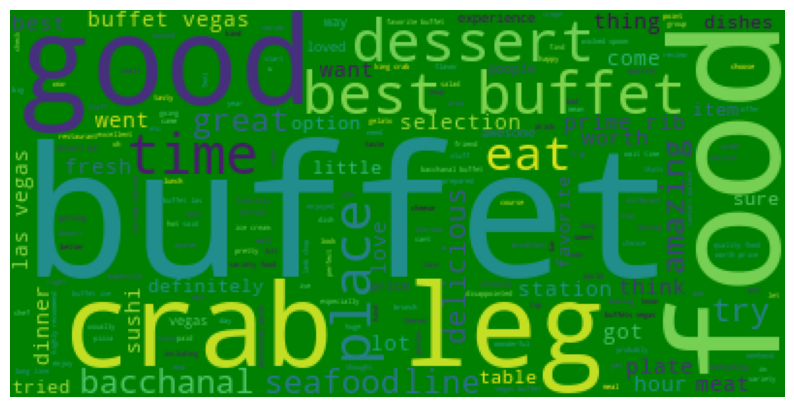

In [61]:
# Örnek: pozitif yorum kelime bulutu
wc(positive['review'], color='green')

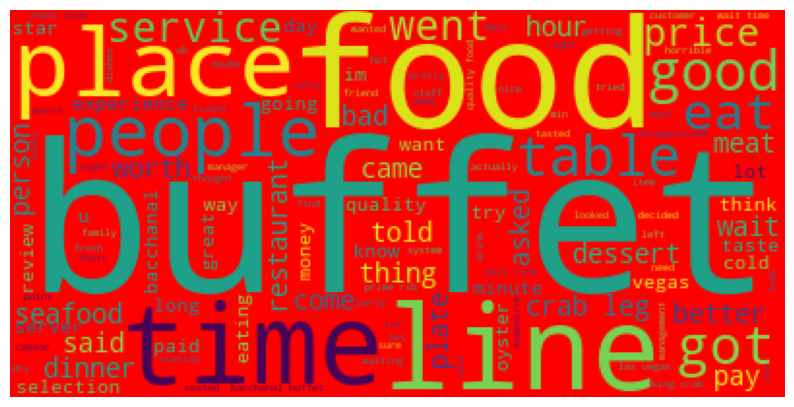

In [62]:
# Örnek: negatif yorum kelime bulutu
wc(negative['review'], color='red')

In [63]:
def wc(data,color):
    # Kelime bulutu fonksiyonunu tanımlar

    plt.figure(figsize=(10,10))
    # Grafik boyutunu 10x10 olacak şekilde ayarlar

    mask = np.array(Image.open('cloud.png'))
    # cloud.png görselini maske olarak yükler

    wc = WordCloud(background_color=color, stopwords=STOPWORDS, mask=mask)
    # Arka plan rengi, stopwords ve mask parametreleri ile WordCloud oluşturur

    wc.generate(' '.join(data))
    # Data’daki metinleri birleştirerek kelime bulutu üretir

    plt.imshow(wc)
    # Oluşturulan kelime bulutunu ekrana çizer

    plt.axis('off')
    # Grafik eksenlerini kapatarak sade görünüm sağlar

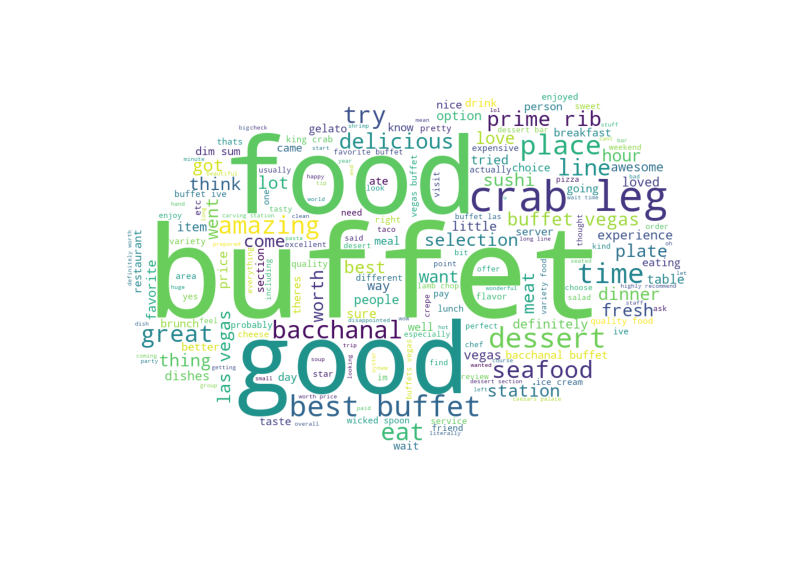

In [64]:
# Pozitif yorumlar için beyaz arka planlı ve cloud.png maskeli kelime bulutu
wc(positive['review'], color='white')

### _Sentiment Analysis_

In [65]:
from textblob import TextBlob

# TextBlob kütüphanesindeki sınıfı projeye dahil eder

In [67]:
text1 = 'Not worth it! Too salty food and expensive'

In [68]:
blob = TextBlob(text1)

# test3 metninden bir TextBlob nesnesi oluşturur

In [69]:
blob.sentiment

# metnin duygu analizini (polarity ve subjectivity) hesaplar

Sentiment(polarity=-0.34375, subjectivity=0.39999999999999997)

In [70]:
blob.sentiment.polarity

# metnin duygu değerini sayı olarak döndürür

-0.34375

In [71]:
blob.sentiment.subjectivity

# metnin öznelik derecesini döndürür

0.39999999999999997